<a href="https://colab.research.google.com/github/ahd-rafi/Machine-Learning-Projects/blob/main/Linear_Regression_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION USING MULTIPLE FEATURES**

In [265]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [266]:
from urllib.request import urlretrieve

In [267]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7d3f7c707be0>)

In [268]:
import pandas as pd

In [269]:
medical_df = pd.read_csv('medical.csv')

In [270]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [271]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [272]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [274]:
import numpy as np

In [275]:
def my_rmse(targets, Predictions):
  return np.sqrt(np.mean(np.square(targets - Predictions)))

In [276]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

prediction = model.predict(inputs)

# my_loss = my_rmse(targets, prediction)
# my_loss

loss = mean_squared_error(targets, prediction, squared= False)
loss

4662.3128354612945

In [277]:
non_smoker_df.select_dtypes(np.number).corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


In [278]:
import plotly.express as px

In [279]:
fig = px.scatter(non_smoker_df, x = 'bmi', y = 'charges', title = 'BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [280]:
fig = px.scatter_3d(non_smoker_df, x = 'age', y = 'bmi', z = 'charges', title = 'Age, BMI vs Charges')
fig.update_traces(marker_size = 5,  marker_opacity = 0.5)
fig.show()

In [281]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [282]:
input, target = non_smoker_df[['bmi']], non_smoker_df['charges']

model = LinearRegression().fit(input, target)

prediction = model.predict(input)

loss = mean_squared_error(target, prediction, squared = False)
loss

5969.772531913293

In [283]:
non_smoker_df.select_dtypes(np.number).corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


In [284]:
fig = px.strip(non_smoker_df, x= 'children', y = 'charges', title =  'children vs charges ')
fig.update_traces(marker_size = 5, marker_opacity = 0.7)
fig.show()

In [285]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

prediction = model.predict(inputs)

loss = mean_squared_error(target, prediction, squared = False)
loss

4608.470405038247

In [286]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

prediction = model.predict(inputs)

loss = mean_squared_error(targets, prediction, squared = False)
loss

11355.317901125973

In [287]:
px.scatter(medical_df, x = 'age', y = 'charges', color = 'smoker')

**Using Categorical features for Machine Learning**

Single_feature Linear Regression Eqn:

Charges = w1 * age(inputs) + b

Multiple_features Linear Regression Eqn:

Charges = w1 * age + w2 * bmi + w3 * children + b

---



<Axes: xlabel='smoker', ylabel='charges'>

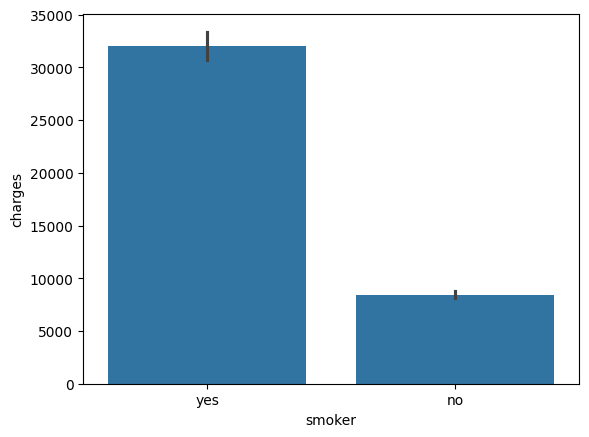

In [288]:
import seaborn as sns
sns.barplot(medical_df, x = 'smoker', y = 'charges')

In [289]:
smoker_codes = {'yes': 1, 'no': 0}

medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [290]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [291]:
medical_df.select_dtypes(np.number).corr()

,age,bmi,children,charges,smoker_code
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_code,-0.025019,0.003750,0.007673,0.787251,1.000000


In [292]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

prediction = model.predict(inputs)

loss = mean_squared_error(targets, prediction, squared= False)
loss

6056.439217188081

In [293]:
sex_codes = {'male': 1, 'female': 0 }

medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [294]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [295]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [296]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

prediction = model.predict(inputs)

loss = mean_squared_error(targets, prediction, squared= False)
print('Loss: ', loss)

Loss:  6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

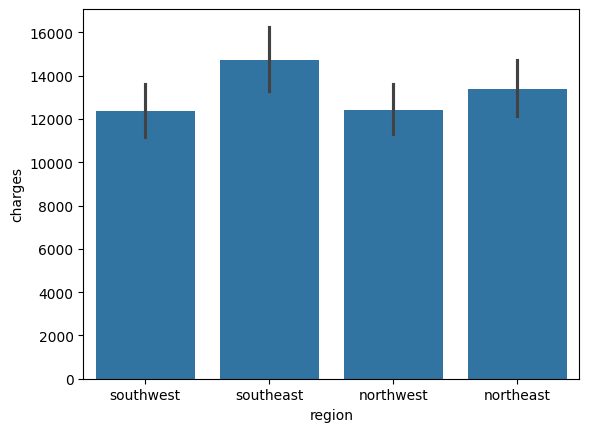

In [297]:
sns.barplot(data = medical_df, x = 'region', y = 'charges')

In [298]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()

enc.fit(medical_df[['region']])

enc.categories_

# type(medical_df['region']), medical_df['region'].shape
# type(medical_df[['region']]), medical_df['region'].shape

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [299]:
enc.transform([['northeast'], ['northwest']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [300]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [301]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [302]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [303]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast',	'northwest',	'southeast',	'southwest']

inputs, targets = medical_df[input_cols], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

prediction = model.predict(inputs)

loss = mean_squared_error(targets, prediction, squared= False)
print('Loss: ', loss)

Loss:  6041.6796511744515


In [304]:
smokers_df = medical_df[medical_df.smoker == 'yes']
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [305]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast',	'northwest',	'southeast',	'southwest']

inputs, targets = smokers_df[input_cols], smokers_df['charges']

model = LinearRegression().fit(inputs, targets)

prediction = model.predict(inputs)

loss = mean_squared_error(targets, prediction, squared= False)
print('smokers_df Loss: ', loss)

smokers_df Loss:  5668.4678821121515


In [306]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast',	'northwest',	'southeast',	'southwest']

inputs, targets = non_smoker_df[input_cols], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

prediction = model.predict(inputs)

loss = mean_squared_error(targets, prediction, squared= False)
print('non_smoker_df Loss: ', loss)

non_smoker_df Loss:  4573.074988795492


**Model Improvements**

In [307]:
medical_df[input_cols].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [308]:
model

LinearRegression()

In [309]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0.]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([6394.61773808])

In [310]:
model.coef_

array([ 2.64481438e+02,  1.89804618e+01,  5.87458257e+02, -2.84217094e-14,
       -5.25970487e+02,  7.33683019e+02,  1.85554256e+02, -2.58365372e+02,
       -6.60871903e+02])

In [311]:
model.intercept_

-2940.747154556304

In [312]:
weight_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weight_df

,feature,weight
0,age,2.644814e+02
1,bmi,1.898046e+01
2,children,5.874583e+02
3,smoker_code,-2.842171e-14
4,sex_code,-5.259705e+02
5,northeast,7.336830e+02
6,northwest,1.855543e+02
7,southeast,-2.583654e+02
8,southwest,-6.608719e+02
9,1,-2.940747e+03


In [313]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [314]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [315]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [316]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [317]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [318]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [319]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [320]:
cat_cols = ['smoker_code', 'sex_code', 'northeast',	'northwest',	'southeast',	'southwest']
categorical_data = medical_df[cat_cols].values

In [321]:
inputs

,age,bmi,children,smoker_code,sex_code,northeast,northwest,southeast,southwest
1,18,33.770,1,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,1,0.0,1.0,0.0,0.0
5,31,25.740,0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1332,52,44.700,3,0,0,0.0,0.0,0.0,1.0
1333,50,30.970,3,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0


In [323]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
target = medical_df.charges

model  = LinearRegression().fit(inputs, target)


prediction = model.predict(inputs)

loss = mean_squared_error(target, prediction, squared=False)
print('loss: ', loss)

loss:  6041.6796511744515


In [327]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [326]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending = False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [328]:
new_customer = [[28, 30, 2, 1, 0, 0, 1, 0, 0.]]

In [329]:
scaler.transform([[28, 30, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [330]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0.]])

array([29875.81463371])